# Web Scraping Demo - vectorize

---

# Scraping MSBA website
+ Scrape text from MSBA website
+ Process and create dataframe
+ Generate wordcloud of word frequencies
+ Vectorize text and plot top words from MSBA website
+ Do the same thing for MBA
+ Compose a reusable function to do it for other MSB program sites

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [15]:
# 1 Pass URL
html = requests.get("https://msb.georgetown.edu/msba/").text

# 2 Make it soup object
soup_msba = BeautifulSoup(html, 'lxml')

In [16]:
# soup_msba

In [17]:
# 3 Parse: Find first element on page with p tag
#     .find(): returns first element with specific HTML tag
#     .find_all(): returns all elements with specified HTML tag (returns a list)
# soup_msba.find("p")
# soup_msba.find("p").text
# soup_msba.find_all("p")
# for each in soup_msba.find_all("p"):
#      print(each.text)
# for each in soup_msba.find_all("p"):
#     print(each.text)
#     print("\n NEXT \n")

In [18]:
# Extract all the content with p tag and save as a list
msba_p = [each.text for each in soup_msba.find_all("p")]

In [19]:
# msba_p

In [20]:
# Convert list of content to dataframe
df = pd.DataFrame(msba_p,
                 columns=["text"])

In [21]:
df

,text
0,"Discover how to create, share, and sustain val..."
1,The online Master in Business Analytics offere...
2,"In this premier program, you will discover a r..."
3,"Throughout the online MSBA program, you will c..."
4,The program includes two required and intensiv...
5,Students also participate in hands-on training...
6,"By graduation, you will speak the language of ..."
7,Georgetown McDonough’s Master of Science in Bu...
8,"Throughout the program, you will have access t..."
9,You will also connect to Georgetown’s vast glo...


### WordCloud

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

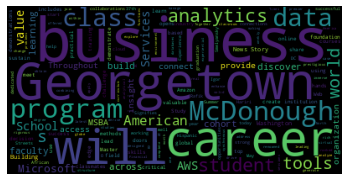

In [23]:
# Join all columns into a single sting, word size in wordcloud corresponds to word frequency
wc = WordCloud().generate(" ".join(df["text"]))
plt.axis("off")
plt.imshow(wc)
plt.show()

### Vectorize and plot word frequencies

In [24]:
# All text from site represented as one row of data (one "document")
df = pd.DataFrame({"text":" ".join(df["text"])},
                           index=[0])

In [25]:
df

,text
0,"Discover how to create, share, and sustain val..."


In [26]:
# Import vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
# Instantiate vectorizer
v = CountVectorizer(stop_words="english")

In [28]:
# Vectorize msba column of text (remove stopwords count frequency of unique words)
dtm = v.fit_transform(df["text"])

In [29]:
# Create as datafrmae with dense arrays and use words a column names from vectorizer
dtm_df = pd.DataFrame(dtm.toarray(),
                     columns=v.get_feature_names_out())

In [30]:
dtm_df

,05,11,15,16,18,19,2005,20057,202,2023,...,washington,way,web,weekly,working,workshops,world,worldwide,year,york
0,1,1,1,1,1,1,1,2,1,6,...,3,1,2,1,2,1,5,1,2,1


In [31]:
# Transpose dataframe
dtm_df = dtm_df.T

In [32]:
# dtm_df

In [33]:
# Reset index, replace column names with term and freq
dtm_df.reset_index(inplace=True)
dtm_df.columns = ["term", "freq"]

In [34]:
dtm_df.sort_values(by="freq", ascending=False)

,term,freq
40,business,14
127,georgetown,9
42,career,8
174,mcdonough,7
209,program,7
...,...,...
118,explore,1
121,financial,1
122,form,1
124,functions,1


In [35]:
# Import altair for data visualization
import altair as alt

In [36]:
# Plot and sort y by descending x value
alt.Chart(dtm_df[dtm_df["freq"] > 2]).mark_bar().encode(alt.Y("term", sort="-x"),
                                      x = "freq")

alt.Chart(...)

### People routinely use mentions to understand the characteristics of entities and make decisions

![compare](compare_rev.png)

# Now let's look at the MBA site

In [37]:
# 1 Pass URL
html = requests.get("https://msb.georgetown.edu/mba/").text

# 2 Make it soup object
soup_mba = BeautifulSoup(html, 'lxml')

In [38]:
for each in soup_mba.find_all("p"):
    print(each.text)
    print("\n NEXT P \n")

Follow Us

 NEXT P 

You already know you’re capable of greatness. But wondering just how much you could achieve isn’t enough. To truly have an impact on the world, you have to go find out exactly what you’re made of. When you earn your MBA here, you’ll no longer wonder how much you could accomplish. Instead, you’ll know.

 NEXT P 

Quick Links

 NEXT P 

Returning users: Log in to continue or complete your application

 NEXT P 

Round 1 | October 2, 2023Round 2 | January 4, 2024Round 3 | March 26, 2024Round 4 | April 30, 2024

 NEXT P 

The Georgetown McDonough MBA has a curriculum designed to prepare you for the global stage, plus the unrivaled access that only Washington, D.C., can offer. Our program is the perfect launchpad for discovering your true strength.You’ll have access to the same engaging faculty, gain hands-on consulting knowledge through the Global Business Experience, build your network of over 200,000 alumni, and receive individualized support from the MBA Career Cente

In [39]:
# 3 Extract all the content with p tag and save as a list
mba_p = [each.text for each in soup_mba.find_all("p")]

In [40]:
# Convert list of content to dataframe
df = pd.DataFrame(mba_p,
                 columns=["text"])

### WordCloud

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

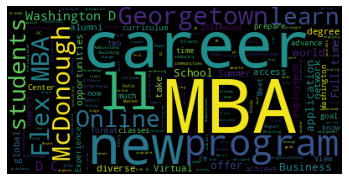

In [42]:
# Join all columns into a single sting, word size in wordcloud corresponds to word frequency
wc = WordCloud().generate(" ".join(df["text"]))
plt.axis("off")
plt.imshow(wc)
plt.show()

### Vectorize and plot word frequencies

In [43]:
# All text from site as one row of data (one "document")
df = pd.DataFrame({"text":" ".join(df["text"])},
                           index=[0])

In [44]:
# Import vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
# Instantiate vectorizer
v = CountVectorizer(stop_words="english")

In [46]:
# Vectorize msba column of text (remove stopwords count frequency of unique words)
dtm = v.fit_transform(df["text"])

In [47]:
# Create as datafrmae with dense arrays and use words a column names from vectorizer
dtm_df = pd.DataFrame(dtm.toarray(),
                     columns=v.get_feature_names_out())

In [48]:
# Transpose dataframe
dtm_df = dtm_df.T

In [49]:
dtm_df

,0
000,1
12,1
16,1
20,1
200,1
...,...
working,1
world,4
written,1
year,1


In [50]:
# Reset index, replace column names with term and freq
dtm_df.reset_index(inplace=True)
dtm_df.columns = ["term", "freq"]

In [51]:
# Import altair for data viz
import altair as alt

In [52]:
# Plot and sort y by descending x value
alt.Chart(dtm_df[dtm_df["freq"] > 2]).mark_bar().encode(alt.Y("term", sort="-x"),
                                      x = "freq")

alt.Chart(...)

## Making decisions
+ People/customers often make decisions by comparing the attributes associated with the options and choosing the one that aligns with their preferences or an organization's goals
+ We can see this with how google organizes its reviews and what people mention in their reviews

# Bringing it all together
+ **Goal**: Data-driven way to efficiently compare programs at McDonough School Business
+ To do so, we will define a function that:
1. Issues a GET request to MSB's website based on the program that specify
2. Converts to a soup object to parse the raw content
3. Extracts the raw text from all "p" tags on the page and creates a dataframe with results
4. Instantiates a vectorizer to vectorize the text based on ngram parameters we specify
5. Vectorizes the text, creates a dataframe with terms and frequencies
6. Transposes the dataframe and renames columns so it is two columns: text, freq
7. Uses the dataframe to create an ordered plot in descending order of unique terms mentioned more than 2 times
8. Returns the plot

In [53]:
def scrape_msb_plot(program, ngram_min, ngram_max):
    """
    Function to scrape MSB program website, vectorize content and plot most frequently used words
    
    Parameters
    ----------
    program (str): 
        graduate program at McDonough School of Business
    ngram_min (int): 
        minimum n-gram when vectorizing
    ngram_max (int): 
        maximum n-gram when vectorizing
        
    Returns
    ----------
    altair plot
    """
    
    import requests
    from bs4 import BeautifulSoup
    import pandas as pd
    from sklearn.feature_extraction.text import CountVectorizer
    import altair as alt
    
    # 1. Issues a GET request to MSB's website based onthe program that specify
    html = requests.get(f"https://msb.georgetown.edu/{program}/").text
    
    # 2 Converts to a soup object to parse
    soup = BeautifulSoup(html, 'lxml')
    
    # 3 Extracts the raw text from all "p" tags on the page and creates a dataframe with results
    content = [each.text for each in soup.find_all("p")]
    prog_text = " ".join(content) 
    
    df = pd.DataFrame({
    "text": [prog_text]})
    
    # 4 Instantiates a vectorizer to vectorize the text (extract features) based on ngram parameters we specify
    v = CountVectorizer(stop_words="english",
                       ngram_range=(ngram_min, ngram_max))
    
    # 5 Vectorizes the text, creates a dataframe with terms and frequencies
    dtm = v.fit_transform(df["text"])
    
    dtm_df = pd.DataFrame(dtm.toarray(),
                     columns=v.get_feature_names_out())
    
    # 6 Transposes the dataframe, make index a column, and renames columns so it is two columns: text, freq
    dtm_df = dtm_df.T
    dtm_df.reset_index(inplace=True)
    dtm_df.columns = ["term", "freq"]
    
    # 7 Uses the dataframe to create an ordered plot in descending order of unique terms mentioned more than 2 times
    plot = alt.Chart(dtm_df[dtm_df["freq"] > 2]).mark_bar().encode(alt.Y("term", sort="-x"),
                                      x = "freq")
    
    # 8 Returns the plot
    return plot
    

In [54]:
# Other MSB Programs:
# masters-global-real-assets
# masters-in-management
# masters-international-business-policy

scrape_msb_plot("masters-international-business-policy", ngram_min=1, ngram_max=1)

alt.Chart(...)

In [ ]:
scrape_msb_plot("mba", ngram_min=3, ngram_max=3)

In [ ]:
help(scrape_msb_plot)